In [19]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
from keras.models import load_model
import pandas as pd
import numpy as np
from PIL import Image
from keras.applications.mobilenetv2 import MobileNetV2, preprocess_input
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, auc, f1_score
from tqdm import tqdm
import scikitplot as skplt
import glob
import matplotlib.pyplot as plt

In [27]:
test = pd.read_csv("test.csv")
test.head(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization,label,label_cat
0,HAM_0001233,ISIC_0029110,nv,follow_up,35.0,male,upper extremity,0,5
1,HAM_0002312,ISIC_0025650,bcc,histo,70.0,male,face,1,1
2,HAM_0004056,ISIC_0034051,mel,histo,55.0,female,upper extremity,1,4
3,HAM_0000885,ISIC_0025293,nv,follow_up,40.0,female,upper extremity,0,5
4,HAM_0002696,ISIC_0026207,mel,histo,45.0,female,foot,1,4
5,HAM_0000267,ISIC_0029530,nv,histo,80.0,male,lower extremity,0,5
6,HAM_0001003,ISIC_0028629,nv,follow_up,70.0,male,back,0,5
7,HAM_0001777,ISIC_0034084,nv,histo,35.0,female,lower extremity,0,5
8,HAM_0000867,ISIC_0028044,nv,follow_up,45.0,female,abdomen,0,5
9,HAM_0000938,ISIC_0031916,nv,follow_up,40.0,female,foot,0,5


In [3]:
test["label"].value_counts()

0    1612
1     391
Name: label, dtype: int64

In [4]:
def calcul_metrics(y_true, y_pred):
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
    return (roc_auc_score(y_true, y_pred), auc(recall, precision))

In [5]:
x_test = []
y_test = []
y_test_cat = []
for img in tqdm(test.iterrows()):
    n = img[1]["image_id"]+".jpg"
    
    im = Image.open("/home/yannis/Developpement/ppd-GAN-for-medical-imaging/dataset-4-skin-cancer/data/all/"+n)
    image2 = im.resize((224,224))
    image3 = im.resize((96,96))

    x_test.append(preprocess_input(np.array(image2).astype(np.float32)))
    
    y_test.append(int(img[1]["label"]))
    y_test_cat.append(int(img[1]["label_cat"]))
    
x_test = np.array(x_test)
y_test = np.array(y_test)
y_test_cat = np.array(y_test_cat)

2003it [00:11, 171.90it/s]


In [6]:
model = load_model("/home/yannis/Developpement/ppd-GAN-for-medical-imaging/models/dataset-4-skincancer/comparaison/Mobilnet_GAN-labelised/best_model_epoch.hdf5")

In [7]:
pred = model.predict(x_test)

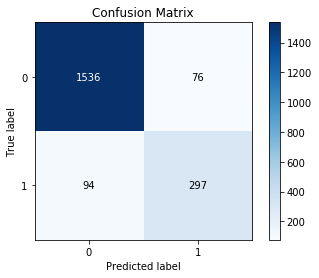

In [24]:
skplt.metrics.plot_confusion_matrix(y_test, np.argmax(pred, axis=1))

In [10]:
predictions = np.argmax(pred, axis=1)

In [8]:
types_cancer = np.array(list(test["label_cat"]))

In [12]:
diff = predictions != y_test

In [14]:
difference = types_cancer[diff]

In [21]:
diffpd = pd.DataFrame(difference)

In [24]:
diffpd[0].value_counts()

4    76
5    37
2    31
1    10
0     8
3     6
6     2
Name: 0, dtype: int64

In [25]:
test["label_cat"].value_counts()

5    1341
4     223
2     220
1     103
0      65
6      28
3      23
Name: label_cat, dtype: int64

## cat 

In [25]:
model = load_model("/home/yannis/Developpement/ppd-GAN-for-medical-imaging/models/dataset-4-skincancer/comparaison-cat/Mobilnet_ACGAN_weighted/best_model_epoch.hdf5")

In [26]:
pred = model.predict(x_test)

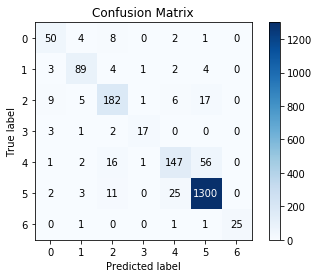

In [27]:
skplt.metrics.plot_confusion_matrix(y_test_cat, np.argmax(pred, axis=1))